#### Saikiran N. Pasikanti
## Machine Learning Foundation
# SVM_Naive Bayes
Build SVM Model using "mushrooms" dataset provided to you. Perform the following Operations.
- a) Read and view data in R
- b) Use Appropriate method to find out the Significant variables.
- c) Divide the dataset into Development and Validation Samples.
- d) Build SVM Model using linear Kernel and check Accuracy using Validation samples.
- e) Build SVM Model using Radial Basis Kernel and check Accuracy using Validation samples, tune the model for best Result.

In [2]:
################  READING THE DATASET                  ######################
setwd("C:\\Users\\saikiran\\Documents\\GitHub\\MLF Foundation using R\\SVM_Naive Bayes")          # Set the working directory
m <- read.csv("mushrooms.csv", stringsAsFactors = TRUE)# Read the data set
original <- m                                          # Back up of Original dataset

In [3]:
################  DATA EXPLORATION                     ######################
dim(m)

[1] 5734   23

In [4]:
str(m)                                                 # All variables are factors

'data.frame':	5734 obs. of  23 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 8 levels "a","c","f","l",..: 6 1 4 6 5 1 1 4 6 1 ...
 $ gill.attachment         : Factor w/ 1 level "f": 1 1 1 1 1 1 1 1 1 1 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 10 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 7 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.root  

In [5]:
# Class is the dependent variable##   Variables "veil.type", "gill.attachment", "veil.color" has only single level
##   Thus they are not significant on the dependent variable
m$veil.type <- NULL                                    # Dropping the insignificant varibales out of data set
m$gill.attachment <- NULL
m$veil.color <- NULL

summary(m)
summary(m$stalk.root)
##   Stalk.root has some missing values indicated as "?"

table(m$class)                                         # The data set is not biased
names(m)
sum(is.na(m))
                                                       # No missing data in particular
#plot(m)                                               # There is no strong correlation between any two variables

 class    cap.shape cap.surface   cap.color    bruises       odor     
 e:3615   b: 287    f:2155      g      :1650   f:2527   n      :2895  
 p:2119   c:   2    g:   4      n      :1276   t:3207   f      :1494  
          f:2378    s:1224      y      :1020            a      : 400  
          k:  73    y:2351      w      : 859            l      : 400  
          s:  32                e      : 637            p      : 256  
          x:2962                b      : 126            c      : 192  
                                (Other): 166            (Other):  97  
 gill.spacing gill.size   gill.color   stalk.shape stalk.root
 c:4727       b:4857    p      :1346   e:2793      ?: 341    
 w:1007       n: 877    n      : 984   t:2941      b:3569    
                        w      : 966               c: 512    
                        h      : 693               e:1120    
                        g      : 627               r: 192    
                        u      : 487                        

?    b    c    e    r 
 341 3569  512 1120  192


   e    p 
3615 2119 

[1] "class"                    "cap.shape"               
 [3] "cap.surface"              "cap.color"               
 [5] "bruises"                  "odor"                    
 [7] "gill.spacing"             "gill.size"               
 [9] "gill.color"               "stalk.shape"             
[11] "stalk.root"               "stalk.surface.above.ring"
[13] "stalk.surface.below.ring" "stalk.color.above.ring"  
[15] "stalk.color.below.ring"   "ring.number"             
[17] "ring.type"                "spore.print.color"       
[19] "population"               "habitat"

[1] 0

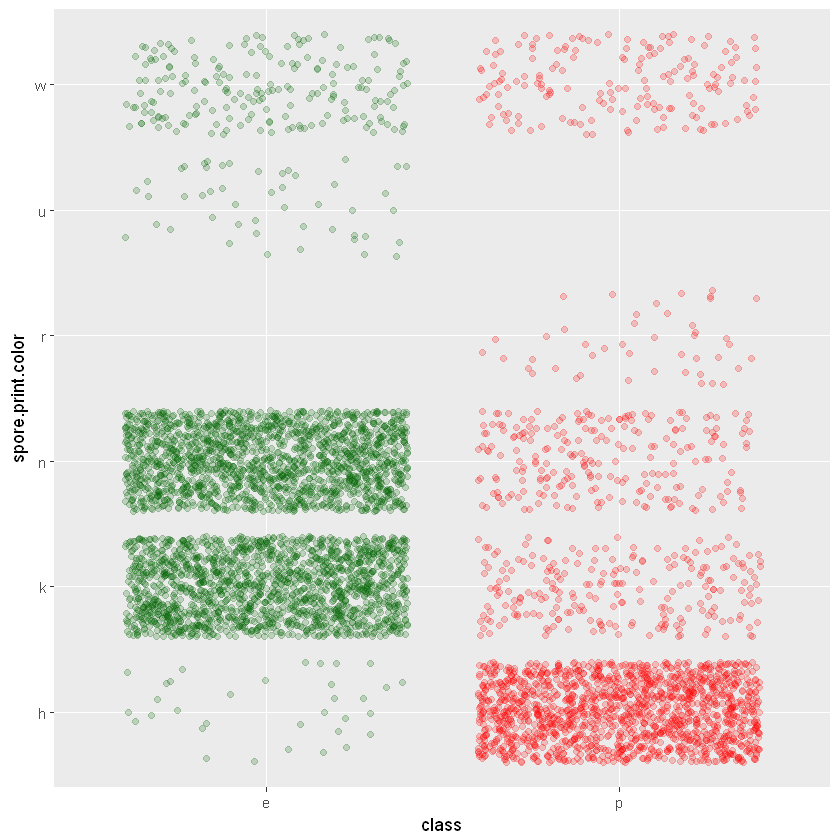

In [6]:
################  DATA VISUALISATION                   ######################

library(ggplot2)
p1 <-  ggplot(m,aes(x=class, y=spore.print.color, color=class))+
  geom_jitter(alpha=0.2)+  
  scale_color_manual(breaks = c('Edible','Poisonous'), values=c('darkgreen','red'))

p1
##  If spore.print.color is r, then mushrooms are poisonous
##  If spore.print.color ir u, then mushrooms are edible

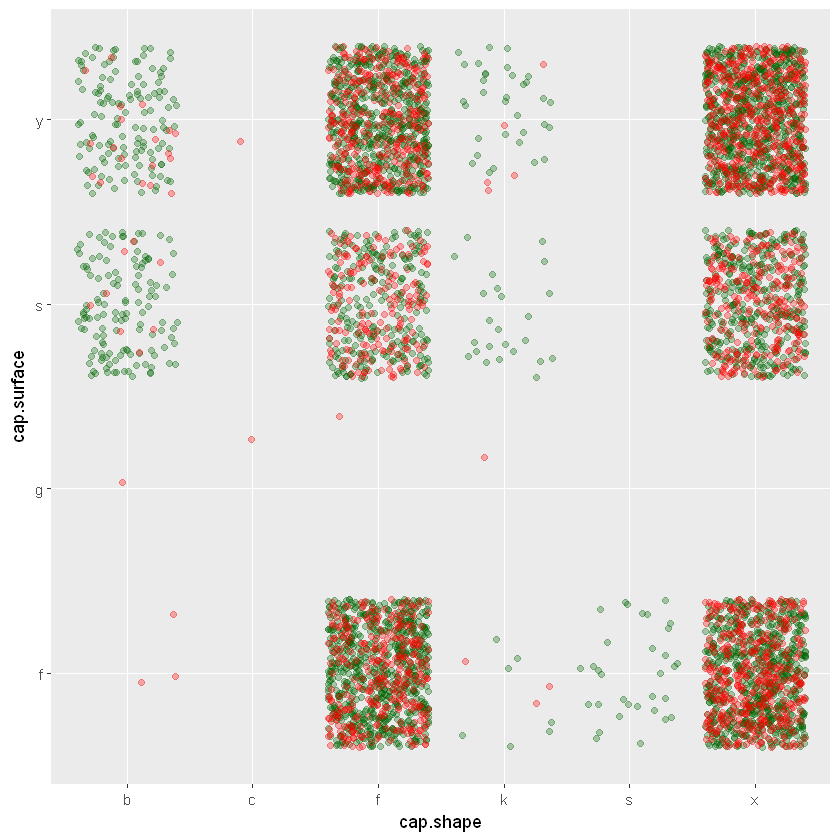

In [7]:
p2 <- ggplot(m,aes(x=cap.shape,  y=cap.surface,  color=class))+
  geom_jitter(alpha=0.3)+  
  scale_color_manual(breaks = c('Edible','Poisonous'),
                     values=c('darkgreen','red'))
p2
##  cap.shape=bell more likey to be edible

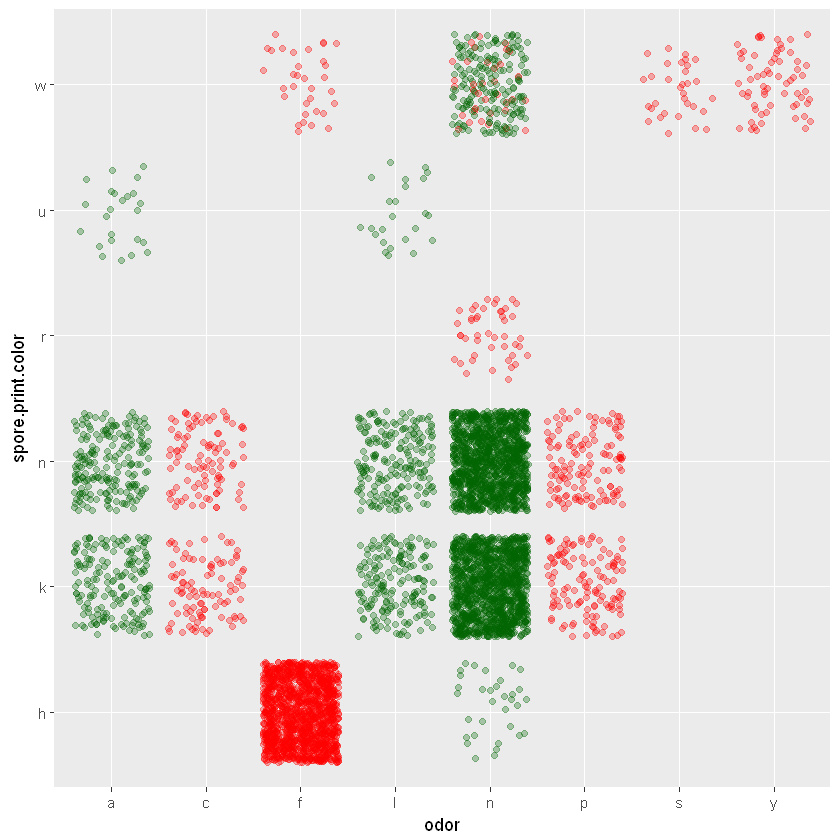

In [8]:
p3 <- ggplot(m, aes(x=odor,  y=spore.print.color, color=class))+
  geom_jitter(alpha=0.3)+  
  scale_color_manual(breaks = c('Edible','Poisonous'),
                     values=c('darkgreen','red'))
p3
##  Odor Foul, Fishy, Pungent, Creosote, and Spicy are highly likely to be poisonous
##  Odor Almond and Anise are highly likely to be edible.
##  Odor None appears to be primarily edible

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(formula = class ~ ., data = m, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0%
Confusion matrix:
     e    p class.error
e 3615    0           0
p    0 2119           0


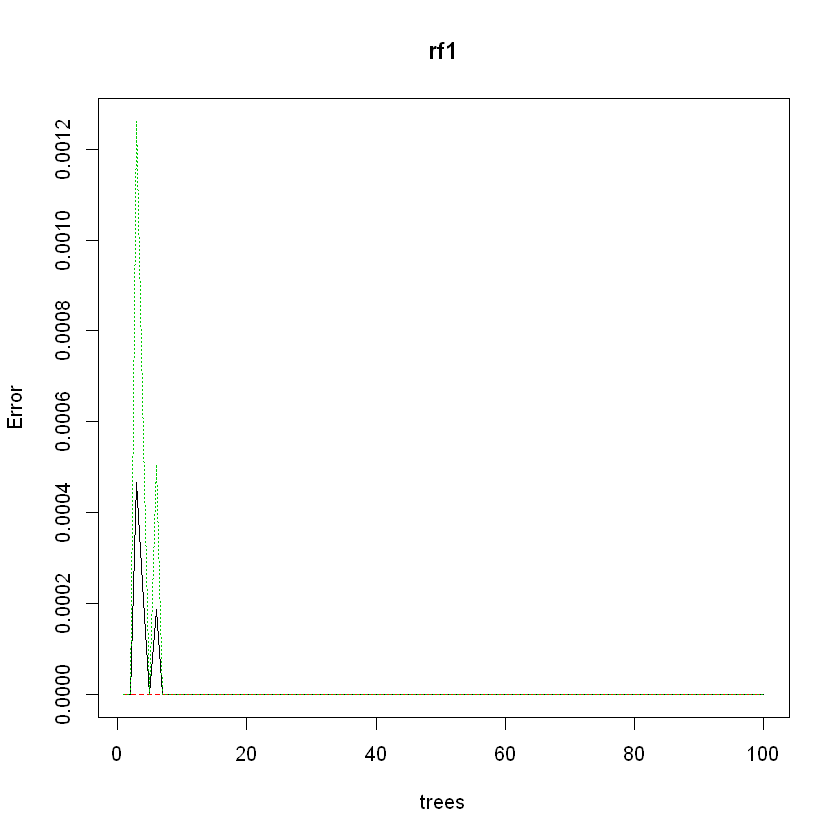

In [9]:
################SIGNIFICANT VARIABLES USING RANDOM FOREST ######################
library(randomForest)                                     # Load library for randomForest
rf1 = randomForest(class ~ ., data = m, ntree = 100 )     # rf model with 100 trees

plot(rf1)                                                 # With trees > 50 ,error almost reaches 0
print(rf1)

In [10]:
library(caret)
varImp(rf1)

Loading required package: lattice


,Overall
cap.shape,6.769858
cap.surface,19.612610
cap.color,45.606704
bruises,25.053324
odor,921.644800
gill.spacing,11.245958
gill.size,185.321964
gill.color,44.571071
stalk.shape,66.102999
stalk.root,52.690011


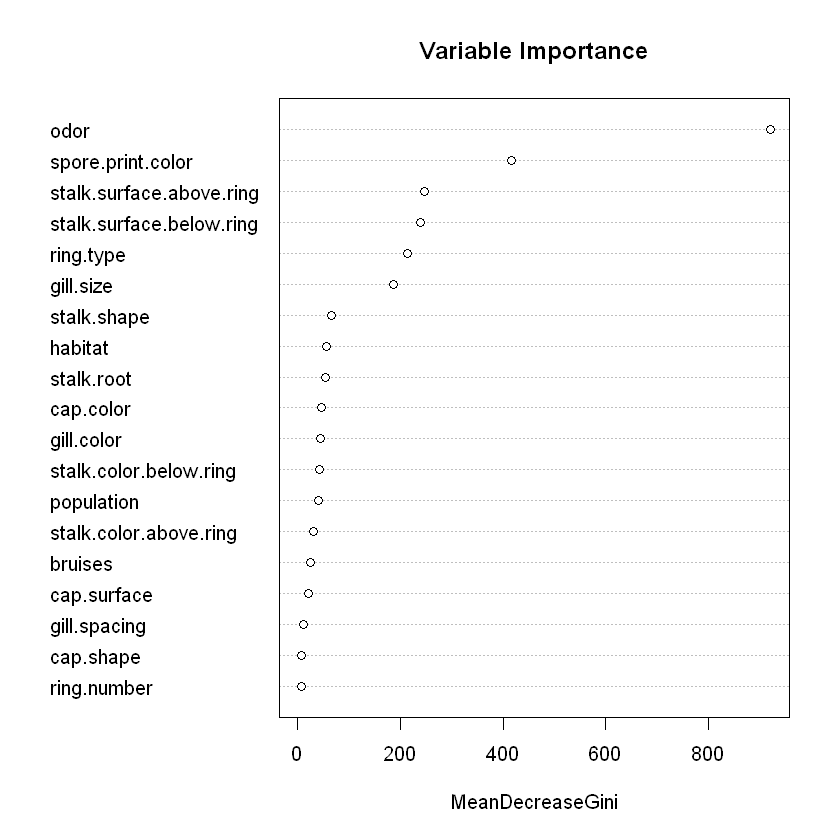

In [11]:
##  The list of significant variables as per the above model are as follows:
varImpPlot(rf1, sort = T, main="Variable Importance")

In [12]:
##  Dropping all the insignificant variables out of the data set
v <- c("cap.shape", "gill.spacing", "ring.number", "population")
m[,v] <- NULL
dim(m)

[1] 5734   16

In [13]:
################  DATASET SPLITTING = TRAIN & TEST        ######################
set.seed(123)
library(caret)                                            # Load require library
trainIndex = createDataPartition(m$class, p=0.7, list=FALSE,times=1)
m.train = m[trainIndex,]
m.test = m[-trainIndex,]

table(m.train$class)                                      # Train data set is not biased

table(m.test$class)


   e    p 
2531 1484 


   e    p 
1084  635 

In [14]:
################  SVM MODEL (With Linear Kernel)          ######################
library(e1071)
svm1=svm(class ~ ., data=m.train, kernel='linear', scale=FALSE)
summary(svm1)
svm1


Call:
svm(formula = class ~ ., data = m.train, kernel = "linear", scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.01515152 

Number of Support Vectors:  141

 ( 79 62 )


Number of Classes:  2 

Levels: 
 e p





Call:
svm(formula = class ~ ., data = m.train, kernel = "linear", scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.01515152 

Number of Support Vectors:  141


In [15]:
##   Predicting the model on the test data for validation
pred1 <- predict(svm1, m.test[,-1])

In [16]:
##   Confusion matrix statistics
print(confusionMatrix (data=mush_pred1, reference = m.test$class) )

ERROR: Error in confusionMatrix(data = mush_pred1, reference = m.test$class): object 'mush_pred1' not found


In [17]:
################  SVM MODEL (With Radial Kernel)          ######################
svm2=svm(class ~ ., data=m.train, kernel="radial")
summary(svm2)


Call:
svm(formula = class ~ ., data = m.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01515152 

Number of Support Vectors:  420

 ( 203 217 )


Number of Classes:  2 

Levels: 
 e p




In [18]:
pred2 <- predict(svm2, m.test[,-1])

print(confusionMatrix(data=pred2, reference = m.test$class))

Confusion Matrix and Statistics

          Reference
Prediction    e    p
         e 1084   10
         p    0  625
                                          
               Accuracy : 0.9942          
                 95% CI : (0.9893, 0.9972)
    No Information Rate : 0.6306          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9875          
 Mcnemar's Test P-Value : 0.004427        
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9843          
         Pos Pred Value : 0.9909          
         Neg Pred Value : 1.0000          
             Prevalence : 0.6306          
         Detection Rate : 0.6306          
   Detection Prevalence : 0.6364          
      Balanced Accuracy : 0.9921          
                                          
       'Positive' Class : e               
                                          


In [19]:
set.seed(123)                                        ## Tuning the above model for better accuracy
tune.out <- tune(svm, class ~ ., data=m.train, kernel="radial",
               ranges=list(cost=c(0.01, 0.1, 1, 10, 100),
                          gamma=c(0.01, 0.1, 1, 2, 3, 4)))

In [20]:
bestmodel <- tune.out$best.model                      ##  Selecting the best model out of all iteration
summary(bestmodel)


Call:
best.tune(method = svm, train.x = class ~ ., data = m.train, ranges = list(cost = c(0.01, 
    0.1, 1, 10, 100), gamma = c(0.01, 0.1, 1, 2, 3, 4)), kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.01 

Number of Support Vectors:  168

 ( 77 91 )


Number of Classes:  2 

Levels: 
 e p




In [21]:
pred3 <-predict(bestmodel, m.test)
print(confusionMatrix(data=pred3, reference = m.test$class))

Confusion Matrix and Statistics

          Reference
Prediction    e    p
         e 1084    0
         p    0  635
                                     
               Accuracy : 1          
                 95% CI : (0.9979, 1)
    No Information Rate : 0.6306     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6306     
         Detection Rate : 0.6306     
   Detection Prevalence : 0.6306     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : e          
                                     
